In [ ]:
from google.colab import drive      # to connect to google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def unpickle(file):
  import pickle
  with open(file, 'rb') as fo:
    dict = pickle.load(fo, encoding='bytes')
  return dict

In [ ]:
file = '/content/drive/MyDrive/Colab Notebooks/cifar-10-batches-py/data_batch_1'

In [ ]:
data = unpickle(file)

data

{b'batch_label': b'training batch 1 of 5',
 b'labels': [6,
  9,
  9,
  4,
  1,
  1,
  2,
  7,
  8,
  3,
  4,
  7,
  7,
  2,
  9,
  9,
  9,
  3,
  2,
  6,
  4,
  3,
  6,
  6,
  2,
  6,
  3,
  5,
  4,
  0,
  0,
  9,
  1,
  3,
  4,
  0,
  3,
  7,
  3,
  3,
  5,
  2,
  2,
  7,
  1,
  1,
  1,
  2,
  2,
  0,
  9,
  5,
  7,
  9,
  2,
  2,
  5,
  2,
  4,
  3,
  1,
  1,
  8,
  2,
  1,
  1,
  4,
  9,
  7,
  8,
  5,
  9,
  6,
  7,
  3,
  1,
  9,
  0,
  3,
  1,
  3,
  5,
  4,
  5,
  7,
  7,
  4,
  7,
  9,
  4,
  2,
  3,
  8,
  0,
  1,
  6,
  1,
  1,
  4,
  1,
  8,
  3,
  9,
  6,
  6,
  1,
  8,
  5,
  2,
  9,
  9,
  8,
  1,
  7,
  7,
  0,
  0,
  6,
  9,
  1,
  2,
  2,
  9,
  2,
  6,
  6,
  1,
  9,
  5,
  0,
  4,
  7,
  6,
  7,
  1,
  8,
  1,
  1,
  2,
  8,
  1,
  3,
  3,
  6,
  2,
  4,
  9,
  9,
  5,
  4,
  3,
  6,
  7,
  4,
  6,
  8,
  5,
  5,
  4,
  3,
  1,
  8,
  4,
  7,
  6,
  0,
  9,
  5,
  1,
  3,
  8,
  2,
  7,
  5,
  3,
  4,
  1,
  5,
  7,
  0,
  4,
  7,
  5,
  5,
  1,
  0,
  9,
  6,
  9,
 

In [ ]:
data[b'data'].shape

(10000, 3072)

170498071/170498071 [==============================] - 2s 0us/step


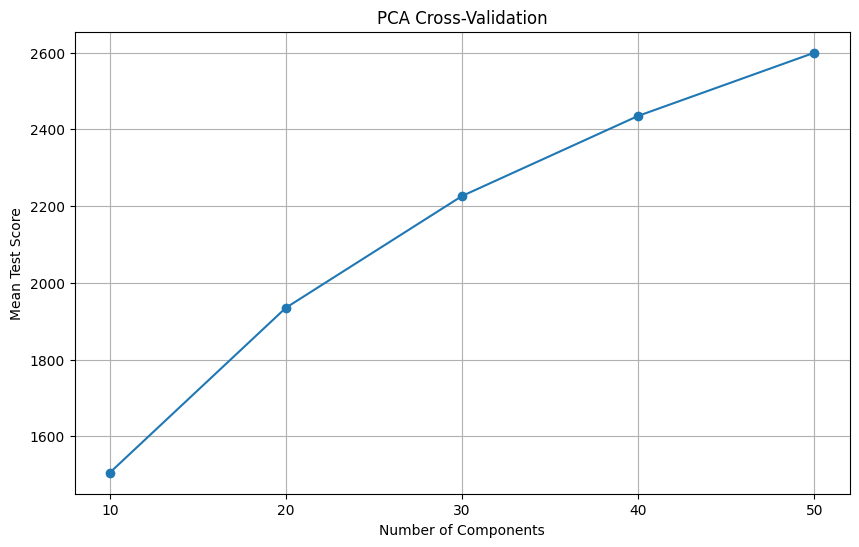

Best number of components: 50


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import ShuffleSplit

# Load CIFAR-10 dataset
(x_train, y_train), (_, _) = cifar10.load_data()

# Reshape and normalize the data
x_train = x_train.reshape(x_train.shape[0], -1).astype('float32') / 255

# Set up the PCA pipeline
pca = PCA()
pipeline = Pipeline([
    ('pca', pca)
])

# Define the range of components to try
n_components = [10, 20, 30, 40, 50]  # Add more if needed

# Perform GridSearchCV with cross-validation
param_grid = {'pca__n_components': n_components}
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)  # Example cross-validation strategy
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=cv)
grid_search.fit(x_train)

# Get the best number of components
best_n_components = grid_search.best_params_['pca__n_components']

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(n_components, grid_search.cv_results_['mean_test_score'], marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Mean Test Score')
plt.title('PCA Cross-Validation')
plt.xticks(n_components)
plt.grid(True)
plt.show()

print("Best number of components:", best_n_components)


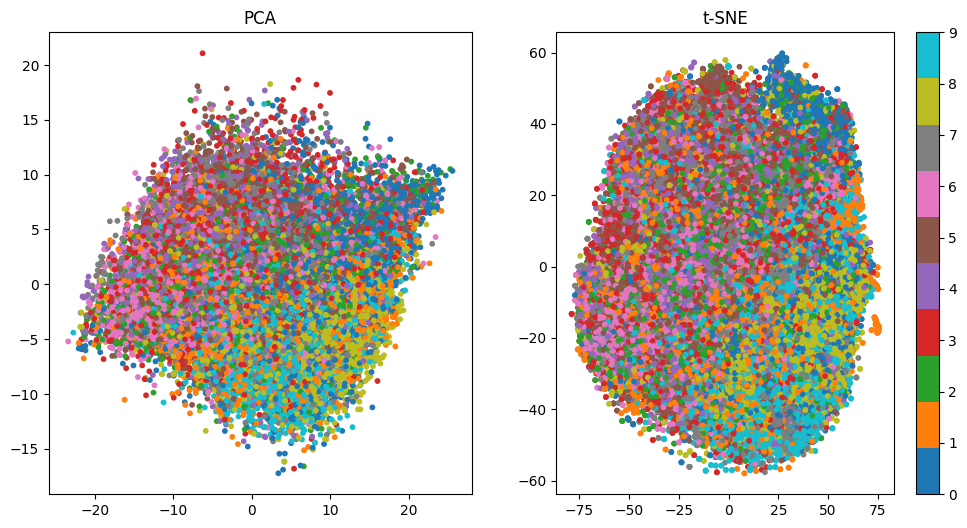

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Reshape and normalize the data
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# PCA
pca = PCA(n_components=50)   # we got Best number of components for pca is 50
x_train_pca = pca.fit_transform(x_train)

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
x_train_tsne = tsne.fit_transform(x_train)

# Plotting
plt.figure(figsize=(12, 6))

# Plot PCA
plt.subplot(1, 2, 1)
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train, cmap='tab10', s=10)
plt.title('PCA')

# Plot t-SNE
plt.subplot(1, 2, 2)
plt.scatter(x_train_tsne[:, 0], x_train_tsne[:, 1], c=y_train, cmap='tab10', s=10)
plt.title('t-SNE')

plt.colorbar()
plt.show()


In [ ]:
pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 8.3 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=7943677bcf94e1cf5b7fbe74714fffd148728b44adf3d02bf6e51ac2ef26a1be
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


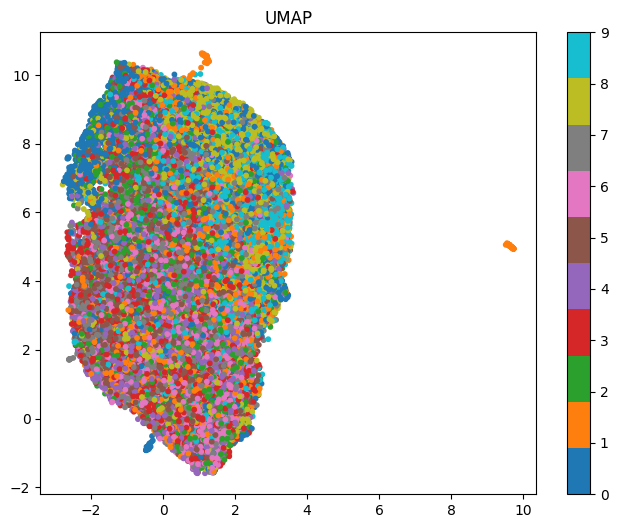

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from umap.umap_ import UMAP

# Load CIFAR-10 dataset
(x_train, y_train), (_, _) = cifar10.load_data()

# Reshape and normalize the data
x_train = x_train.reshape(x_train.shape[0], -1).astype('float32') / 255

# UMAP
umap_model = UMAP(n_neighbors=10, min_dist=0.1, n_components=2)
x_train_umap = umap_model.fit_transform(x_train)

# Plotting
plt.figure(figsize=(8, 6))

# Plot UMAP
plt.scatter(x_train_umap[:, 0], x_train_umap[:, 1], c=y_train, cmap='tab10', s=10)
plt.title('UMAP')
plt.colorbar()
plt.show()

170498071/170498071 [==============================] - 11s 0us/step


<ipython-input-5-e83318cf3c11>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(class_names)


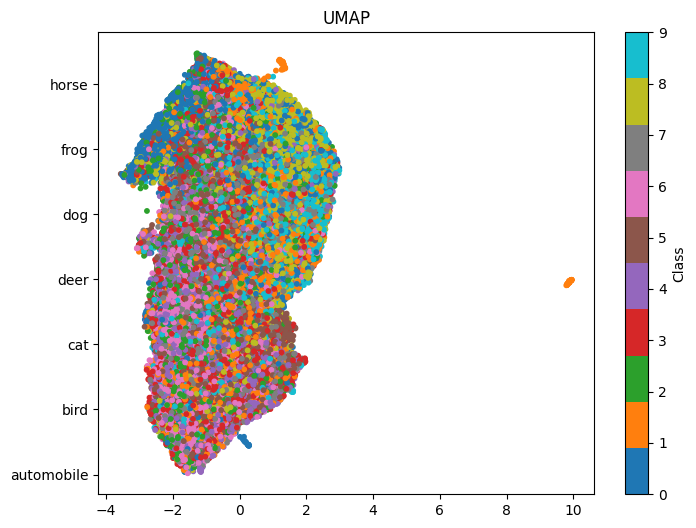

In [ ]:
#umap using classes
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from umap.umap_ import UMAP

# Load CIFAR-10 dataset
(x_train, y_train), (_, _) = cifar10.load_data()

# Reshape and normalize the data
x_train = x_train.reshape(x_train.shape[0], -1).astype('float32') / 255

# UMAP
umap_model = UMAP(n_neighbors=10, min_dist=0.1, n_components=2)
x_train_umap = umap_model.fit_transform(x_train)

# Define class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Plotting
plt.figure(figsize=(8, 6))

# Plot UMAP with class names
plt.scatter(x_train_umap[:, 0], x_train_umap[:, 1], c=y_train, cmap='tab10', s=10)
plt.title('UMAP')
plt.colorbar(ticks=np.arange(10), label='Class')
plt.gca().set_yticklabels(class_names)
plt.show()


Epoch 1/50
196/196 [==============================] - 11s 50ms/step - loss: 0.6378 - val_loss: 0.6147
Epoch 2/50
196/196 [==============================] - 10s 52ms/step - loss: 0.6058 - val_loss: 0.6346
Epoch 3/50
196/196 [==============================] - 10s 50ms/step - loss: 0.5968 - val_loss: 0.5940
Epoch 4/50
196/196 [==============================] - 11s 54ms/step - loss: 0.5922 - val_loss: 0.5927
Epoch 5/50
196/196 [==============================] - 11s 58ms/step - loss: 0.5906 - val_loss: 0.5907
Epoch 6/50
196/196 [==============================] - 10s 50ms/step - loss: 0.5893 - val_loss: 0.5904
Epoch 7/50
196/196 [==============================] - 9s 45ms/step - loss: 0.5881 - val_loss: 0.5883
Epoch 8/50
196/196 [==============================] - 10s 50ms/step - loss: 0.5874 - val_loss: 0.5875
Epoch 9/50
196/196 [==============================] - 13s 64ms/step - loss: 0.5860 - val_loss: 0.5869
Epoch 10/50
196/196 [==============================] - 11s 54ms/step - loss: 0.5852

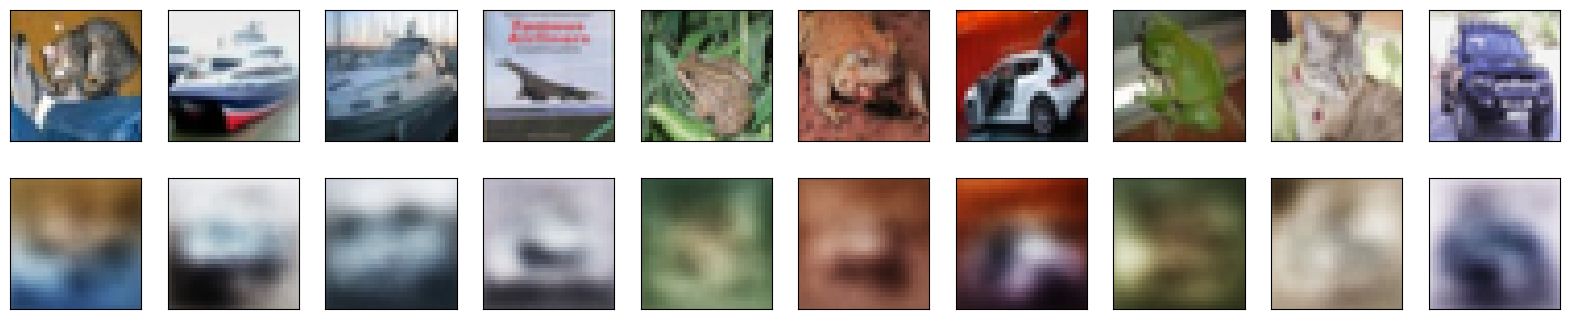

In [ ]:
# Auto encoder

import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Model
from keras.layers import Input, Dense

# Load CIFAR-10 dataset
(x_train, _), (x_test, _) = cifar10.load_data()

# Normalize data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten images
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Define input layer
input_img = Input(shape=(x_train.shape[1],))

# Define encoder
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)

# Define decoder
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(x_train.shape[1], activation='sigmoid')(decoded)

# Define autoencoder model
autoencoder = Model(input_img, decoded)

# Compile model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train autoencoder
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Predict reconstructed images
decoded_imgs = autoencoder.predict(x_test)

# Plot original and reconstructed images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
